#### sample race data

In [6]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

import sqlite3
con = sqlite3.connect("f1_9472.db")

def get_data(url):
    return pd.DataFrame(requests.get(url).json())

In [29]:
url = f'''https://api.openf1.org/v1/drivers?session_key=9472'''
df = get_data(url)
driver_numbers = df.driver_number.tolist()

In [130]:
car_data

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
0,1229,9472,1,2024-03-01 17:03:36.050,0,0,0,104,8,104
1,1229,9472,1,2024-03-01 17:03:36.370,0,0,0,104,8,104
2,1229,9472,1,2024-03-01 17:03:36.650,0,0,0,104,8,104
3,1229,9472,1,2024-03-02 14:03:43.818,0,0,0,0,0,0
4,1229,9472,1,2024-03-02 14:03:44.017,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
34783,1229,9472,81,2024-03-02 16:39:13.527,0,0,0,104,0,104
34784,1229,9472,81,2024-03-02 16:39:13.967,0,0,0,104,0,104
34785,1229,9472,81,2024-03-02 16:39:14.367,0,0,0,104,0,104
34786,1229,9472,81,2024-03-02 16:39:14.607,0,0,0,104,0,104


In [128]:
car_data = pd.DataFrame()
for dri in driver_numbers:
    print(dri)
    url = f'''https://api.openf1.org/v1/car_data?driver_number={dri}&session_key=9472'''
    df = get_data(url)
    car_data = pd.concat([car_data, df])

1
2
3
4
10
11
14
16
18
20
22
23
24
27
31
44
55
63
77
81


In [4]:
url = f'''https://api.openf1.org/v1/laps?session_key=9472'''
lap_data = get_data(url)
# display(lap_data)

race_start = '2024-03-02T15:00:00.000000'

lap_data['date_start'].fillna(race_start, inplace = True)
lap_data['date_start'] = pd.to_datetime(lap_data['date_start'])
lap_data['date_end'] = lap_data.apply(lambda x: np.nan if pd.isna(x.lap_duration) else x.date_start + timedelta(seconds = x.lap_duration), axis = 1) 

C:\Users\Pradeep Gopa\AppData\Local\Temp\ipykernel_68004\3243436687.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lap_data['date_start'].fillna(race_start, inplace = True)


In [5]:
lap_data[lap_data.driver_number == 1]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,date_end
0,1229,9472,1,234.0,250,251.0,2024-03-02 15:00:00.000,NaN,False,NaN,41.266,23.616,"[2064, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2051, 2051, 2049, 2049, 2049, 2049, 205...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",1,NaT
20,1229,9472,1,232.0,248,287.0,2024-03-02 15:05:20.099,96.296,False,30.916,41.661,23.719,"[2049, 2049, 2049, 2049, 2048, 2051, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",2,2024-03-02 15:06:56.395
40,1229,9472,1,231.0,243,290.0,2024-03-02 15:06:56.378,96.753,False,30.999,41.966,23.788,"[None, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",3,2024-03-02 15:08:33.131
60,1229,9472,1,233.0,253,NaN,2024-03-02 15:08:33.130,96.647,False,30.931,41.892,23.824,"[2048, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",4,2024-03-02 15:10:09.777
80,1229,9472,1,231.0,245,289.0,2024-03-02 15:10:09.704,97.173,False,31.255,42.056,23.862,"[None, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",5,2024-03-02 15:11:46.877
100,1229,9472,1,NaN,247,296.0,2024-03-02 15:11:46.978,97.092,False,31.041,42.187,23.864,"[2049, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",6,2024-03-02 15:13:24.070
120,1229,9472,1,232.0,242,291.0,2024-03-02 15:13:24.080,97.038,False,31.015,42.118,23.905,"[2048, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",7,2024-03-02 15:15:01.118
140,1229,9472,1,231.0,250,NaN,2024-03-02 15:15:01.132,97.024,False,31.041,42.077,23.906,"[2049, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",8,2024-03-02 15:16:38.156
160,1229,9472,1,NaN,243,292.0,2024-03-02 15:16:38.044,97.229,False,31.100,42.166,23.963,"[None, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",9,2024-03-02 15:18:15.273
180,1229,9472,1,232.0,244,293.0,2024-03-02 15:18:15.404,96.960,False,30.986,42.009,23.965,"[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",10,2024-03-02 15:19:52.364


In [129]:
car_data['date'] = pd.to_datetime(car_data['date'], format = 'ISO8601')

In [126]:
car_data

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
0,1230,9476,1,2024-03-08 16:46:08.635,0,0,0,0,0,0
1,1230,9476,1,2024-03-08 16:46:08.835,0,0,0,0,0,0
2,1230,9476,1,2024-03-08 16:46:09.115,0,0,0,0,0,0
3,1230,9476,1,2024-03-08 16:46:09.395,0,0,0,0,0,0
4,1230,9476,1,2024-03-08 16:46:09.715,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
19204,1230,9476,81,2024-03-08 18:11:01.651,0,0,0,104,8,104
19205,1230,9476,81,2024-03-08 18:11:02.011,0,0,0,104,8,104
19206,1230,9476,81,2024-03-08 18:11:02.371,0,0,0,104,8,104
19207,1230,9476,81,2024-03-08 18:11:02.851,0,0,0,104,8,104


In [87]:
lap_data

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,date_end
0,1229,9472,1,234.0,250,251.0,2024-03-02 15:00:00.000,NaN,False,NaN,41.266,23.616,"[2064, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2051, 2051, 2049, 2049, 2049, 2049, 205...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",1,NaT
1,1229,9472,2,230.0,249,231.0,2024-03-02 15:00:00.000,NaN,False,NaN,43.162,24.178,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2049, 2048, 0]",1,NaT
2,1229,9472,3,233.0,241,257.0,2024-03-02 15:00:00.000,NaN,False,NaN,43.159,24.451,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2049, 2049, 2049]",1,NaT
3,1229,9472,4,233.0,247,237.0,2024-03-02 15:00:00.000,NaN,False,NaN,43.309,24.244,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2051, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2049, 2049, 2049, 2049]",1,NaT
4,1229,9472,10,231.0,246,272.0,2024-03-02 15:00:00.000,NaN,False,NaN,43.704,24.393,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2049, 2049, 2048, 2049, 2049, 2049]",1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1229,9472,18,235.0,253,NaN,2024-03-02 16:35:23.428,97.335,False,30.994,42.237,24.104,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,2024-03-02 16:37:00.763
1125,1229,9472,44,236.0,264,NaN,2024-03-02 16:34:41.739,96.138,False,30.687,41.847,23.604,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[0, 2048, 2048, 2048, 2048, 2048, 2064]",57,2024-03-02 16:36:17.877
1126,1229,9472,55,239.0,269,305.0,2024-03-02 16:34:17.271,95.327,False,30.550,41.125,23.652,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,2024-03-02 16:35:52.598
1127,1229,9472,63,235.0,261,300.0,2024-03-02 16:34:38.198,96.440,False,30.765,42.018,23.657,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",57,2024-03-02 16:36:14.638


In [131]:
car_data.applymap(str).to_sql('cardata', con, if_exists = 'replace', index = False)

C:\Users\Pradeep Gopa\AppData\Local\Temp\ipykernel_58112\3924632181.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  car_data.applymap(str).to_sql('cardata', con, if_exists = 'replace', index = False)


695965

In [119]:
lap_data.applymap(str).to_sql('laps', con, if_exists = 'replace', index = False)

C:\Users\Pradeep Gopa\AppData\Local\Temp\ipykernel_58112\716338852.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lap_data.applymap(str).to_sql('laps', con, if_exists = 'replace', index = False)


1129

In [95]:
str(d1_lapdata.date_start.iloc[0])

'2024-03-02 15:10:09.704000'

In [99]:
d1 = 1
d2 = 44
d1lap = 5
d2lap = 5

d1_lapdata = lap_data[(lap_data.driver_number == d1) & (lap_data.lap_number == d1lap)]
d2_lapdata = lap_data[(lap_data.driver_number == d2) & (lap_data.lap_number == d2lap)]

url1 = f'''https://api.openf1.org/v1/car_data?session_key=9472&driver_number={d1}&date>={str(d1_lapdata.date_start.iloc[0])}&date<{str(d1_lapdata.date_end.iloc[0])}'''
df1 = get_data(url1)
df1.date = pd.to_datetime(df1.date, format = 'ISO8601')

url2 = f'''https://api.openf1.org/v1/car_data?session_key=9472&driver_number={d2}&date>={str(d2_lapdata.date_start.iloc[0])}&date<{str(d2_lapdata.date_end.iloc[0])}'''
df2 = get_data(url2)
df2.date = pd.to_datetime(df2.date, format = 'ISO8601')

In [108]:
df1.date - d1_lapdata.date_start.iloc[0]

0     0 days 00:00:00.126000
1     0 days 00:00:00.525000
2     0 days 00:00:00.725000
3     0 days 00:00:00.966000
4     0 days 00:00:01.246000
               ...          
365   0 days 00:01:35.886000
366   0 days 00:01:36.286000
367   0 days 00:01:36.566000
368   0 days 00:01:36.726000
369   0 days 00:01:37.126000
Name: date, Length: 370, dtype: timedelta64[ns]

In [110]:
d1_lapdata.lap_duration.iloc[0], d2_lapdata.lap_duration.iloc[0]

(97.173, 98.35)

[]

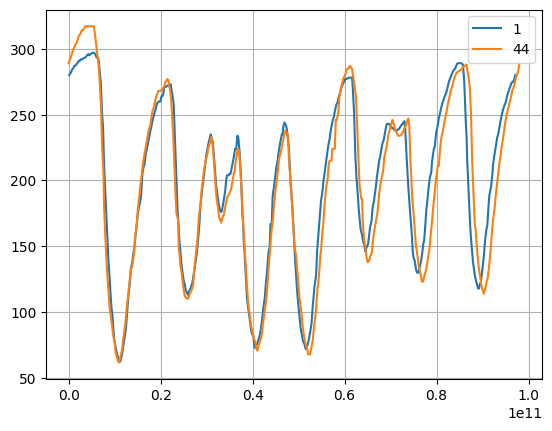

In [112]:
plt.plot(df1.date - d1_lapdata.date_start.iloc[0], df1.speed, label = f'{d1}')
plt.plot(df2.date - d2_lapdata.date_start.iloc[0], df2.speed, label = f'{d2}')
plt.grid()
plt.legend()
plt.plot()

In [65]:
lap_data[lap_data.driver_number == 1].lap_duration

0           NaN
20       96.296
40       96.753
60       96.647
80       97.173
100      97.092
120      97.038
140      97.024
160      97.229
180      96.960
200      97.085
220      97.045
240      97.030
260      97.028
280      97.011
300      97.168
320      99.896
340     117.854
360      95.283
380      95.160
400      95.316
420      95.204
440      95.216
460      95.289
480      95.342
500      95.223
520      95.581
540      95.477
560      95.793
580      95.771
600      95.679
620      95.886
640      95.863
660      96.133
680      96.018
700      96.205
720      99.234
740     116.445
760      92.608
780      96.589
800      95.290
820      94.667
840      94.151
860      94.531
880      94.249
900      94.193
920      94.239
940      94.350
960      94.403
980      94.783
1000     94.340
1020     94.906
1040     95.600
1060     95.334
1080     95.184
1100     94.671
1119     94.923
Name: lap_duration, dtype: float64

#### test plotly

In [110]:
!pip install dash

In [112]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import numpy as np

from dash.dependencies import Input, Output

# Example data (a circle).
resolution = 20
t = np.linspace(0, np.pi * 2, resolution)
x, y = np.cos(t), np.sin(t)
# Example app.
figure = dict(data=[{'x': [], 'y': []}], layout=dict(xaxis=dict(range=[-1, 1]), yaxis=dict(range=[-1, 1])))
app = dash.Dash(__name__, update_title=None)  # remove "Updating..." from title
app.layout = html.Div([dcc.Graph(id='graph', figure=figure), dcc.Interval(id="interval")])


@app.callback(Output('graph', 'extendData'), [Input('interval', 'n_intervals')])
def update_data(n_intervals):
    index = n_intervals % resolution
    # tuple is (dict of new data, target trace index, number of points to keep)
    return dict(x=[[x[index]]], y=[[y[index]]]), [0], 10


if __name__ == '__main__':
    app.run_server()

C:\Users\Pradeep Gopa\AppData\Local\Temp\ipykernel_14308\3472280474.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\Pradeep Gopa\AppData\Local\Temp\ipykernel_14308\3472280474.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


[2024-03-09 01:00:33,876] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Pradeep Gopa\Anaconda\envs\pp\Lib\site-packages\flask\app.py", line 1463, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pradeep Gopa\Anaconda\envs\pp\Lib\site-packages\flask\app.py", line 872, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pradeep Gopa\Anaconda\envs\pp\Lib\site-packages\flask\app.py", line 870, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pradeep Gopa\Anaconda\envs\pp\Lib\site-packages\flask\app.py", line 855, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Prad

#### API endpoints
##### Data can be filtered by any attribute
##### Also can be filtered by time ranges
##### can also extract data by csv

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data(url):
    return pd.DataFrame(requests.get(url).json())

#### drivers

In [132]:
url = f'''https://api.openf1.org/v1/drivers?session_key=latest'''
df = get_data(url)
display(df)

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,9476,1230,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,1,3671c6,Red Bull Racing,VER
1,9476,1230,L SARGEANT,USA,Logan,Logan SARGEANT,https://media.formula1.com/d_driver_fallback_i...,Sargeant,2,64c4ff,Williams,SAR
2,9476,1230,D RICCIARDO,AUS,Daniel,Daniel RICCIARDO,https://media.formula1.com/d_driver_fallback_i...,Ricciardo,3,6692ff,RB,RIC
3,9476,1230,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,4,ff8000,McLaren,NOR
4,9476,1230,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,10,ff87bc,Alpine,GAS
5,9476,1230,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,11,3671c6,Red Bull Racing,PER
6,9476,1230,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,14,229971,Aston Martin,ALO
7,9476,1230,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,16,e8002d,Ferrari,LEC
8,9476,1230,L STROLL,CAN,Lance,Lance STROLL,https://media.formula1.com/d_driver_fallback_i...,Stroll,18,229971,Aston Martin,STR
9,9476,1230,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,20,b6babd,Haas F1 Team,MAG


In [143]:
df[['name_acronym', 'driver_number']].set_index('name_acronym').to_dict()

{'driver_number': {'VER': 1,
  'SAR': 2,
  'RIC': 3,
  'NOR': 4,
  'GAS': 10,
  'PER': 11,
  'ALO': 14,
  'LEC': 16,
  'STR': 18,
  'MAG': 20,
  'TSU': 22,
  'ALB': 23,
  'ZHO': 24,
  'HUL': 27,
  'OCO': 31,
  'BEA': 38,
  'HAM': 44,
  'RUS': 63,
  'BOT': 77,
  'PIA': 81}}

#### car data

In [17]:
url = f'''https://api.openf1.org/v1/car_data?driver_number=55&session_key=latest'''
df = get_data(url)
display(df)

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
0,1230,9474,55,2024-03-07T16:45:01.505000,4083,0,0,0,8,0
1,1230,9474,55,2024-03-07T16:45:01.826000,4027,0,0,0,8,0
2,1230,9474,55,2024-03-07T16:45:01.986000,4015,0,0,0,8,0
3,1230,9474,55,2024-03-07T16:45:02.425000,3946,0,0,0,8,0
4,1230,9474,55,2024-03-07T16:45:02.585000,3903,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...
20626,1230,9474,55,2024-03-07T18:16:46.922000,0,0,0,0,8,0
20627,1230,9474,55,2024-03-07T18:16:47.122000,0,0,0,0,8,0
20628,1230,9474,55,2024-03-07T18:16:47.322000,0,0,0,0,8,0
20629,1230,9474,55,2024-03-07T18:16:47.563000,0,0,0,0,8,0


<Axes: xlabel='date'>

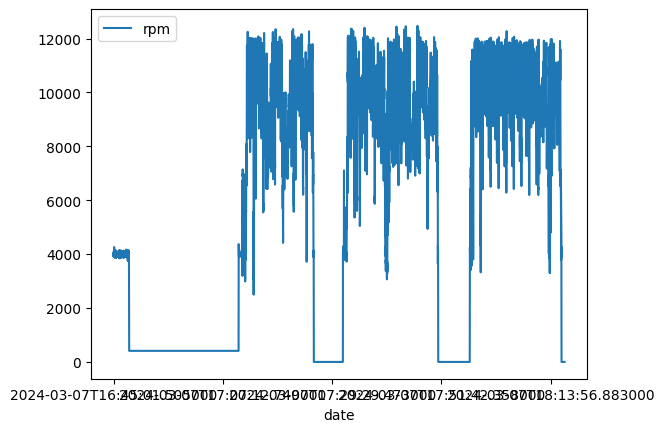

In [19]:
df.plot('date', 'rpm')

In [11]:
pd.DataFrame(requests.get(url).json())

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
0,1230,9474,55,2024-03-07T16:45:01.505000,4083,0,0,0,8,0
1,1230,9474,55,2024-03-07T16:45:01.826000,4027,0,0,0,8,0
2,1230,9474,55,2024-03-07T16:45:01.986000,4015,0,0,0,8,0
3,1230,9474,55,2024-03-07T16:45:02.425000,3946,0,0,0,8,0
4,1230,9474,55,2024-03-07T16:45:02.585000,3903,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...
20626,1230,9474,55,2024-03-07T18:16:46.922000,0,0,0,0,8,0
20627,1230,9474,55,2024-03-07T18:16:47.122000,0,0,0,0,8,0
20628,1230,9474,55,2024-03-07T18:16:47.322000,0,0,0,0,8,0
20629,1230,9474,55,2024-03-07T18:16:47.563000,0,0,0,0,8,0


In [21]:
lower = '2024-03-07T17:34:50'
upper = '2024-03-07T17:35:00'
url = f'''https://api.openf1.org/v1/car_data?session_key=latest&date>={lower}&date<{upper}'''
filtered = get_data(url)
display(filtered)

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
0,1230,9474,1,2024-03-07T17:34:50.155000,11339,251,6,100,8,0
1,1230,9474,2,2024-03-07T17:34:50.155000,10195,289,7,100,8,0
2,1230,9474,3,2024-03-07T17:34:50.155000,3601,0,0,0,8,0
3,1230,9474,4,2024-03-07T17:34:50.155000,11119,277,7,99,8,0
4,1230,9474,10,2024-03-07T17:34:50.155000,11886,194,4,100,8,0
...,...,...,...,...,...,...,...,...,...,...
732,1230,9474,44,2024-03-07T17:34:59.714000,0,0,0,104,8,104
733,1230,9474,55,2024-03-07T17:34:59.714000,9944,188,5,53,8,0
734,1230,9474,63,2024-03-07T17:34:59.714000,3963,0,0,0,8,0
735,1230,9474,77,2024-03-07T17:34:59.714000,9300,172,5,62,8,0


#### intervals

In [28]:
# "available only during races"

url = f'''https://api.openf1.org/v1/intervals?session_key=1229'''
d = get_data(url)
display(d)

""


#### laps

In [ ]:
# sector flags are missing ie green, yellow, purple, but these are available for minisectors (segments sector1, sector2 etc)
# date_start is available, but date_end is missing => can infer this from total lap_duration, but for pit_out_laps this sector 1 & lap_duration is missing

# speed traps speeds are frequently NaNs

In [29]:
url = f'''https://api.openf1.org/v1/laps?session_key=latest&driver_number=1'''
get_data(url)

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1230,9474,1,278.0,305,105,2024-03-07T17:10:28.271000,NaN,True,NaN,30.810,42.895,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2049, 2049]","[2051, 2051, 2051, 2051, 2051, 2049, 2049, 204...",1
1,1230,9474,1,289.0,328,333,2024-03-07T17:12:24.482000,90.447,False,33.035,28.679,28.733,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2051, 2049, 2051, 2051]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",2
2,1230,9474,1,155.0,190,305,2024-03-07T17:13:54.794000,142.246,False,58.009,45.297,38.940,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...",3
3,1230,9474,1,272.0,234,302,2024-03-07T17:16:37.980000,138.845,True,68.467,37.833,32.545,"[2064, 2064, 2064, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2049, 2049, 2049, 2048, 2049, 2049, 2048, 204...",4
4,1230,9474,1,288.0,324,332,2024-03-07T17:18:35.925000,89.897,False,32.669,28.601,28.627,"[2049, 2049, 2048, 2049, 2048, 2049, 2049, 205...","[2049, 2048, 2049, 2049, 2049, 2049, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...",5
5,1230,9474,1,168.0,239,244,2024-03-07T17:20:05.855000,140.266,False,56.733,45.640,37.893,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...",6
6,1230,9474,1,289.0,326,327,2024-03-07T17:22:26.835000,89.543,False,32.438,28.415,28.690,"[None, 2049, 2049, 2049, 2051, 2049, 2049, 205...","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",7
7,1230,9474,1,229.0,223,288,2024-03-07T17:23:55.740000,122.933,False,40.894,44.236,37.803,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...",8
8,1230,9474,1,273.0,184,278,2024-03-07T17:32:18.892000,510.541,True,440.200,35.355,34.986,"[2064, 2064, 2064, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2049, 2049, 2048, 204...",9
9,1230,9474,1,289.0,323,330,2024-03-07T17:34:29.164000,89.377,False,32.519,28.385,28.473,"[2048, 2048, 2049, 2048, 2048, 2049, 2048, 204...","[2048, 2049, 2048, 2049, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",10


In [31]:
# first lap still an issue

url = f'''https://api.openf1.org/v1/laps?session_key=9472&driver_number=1''' #9472 is the sakhir race
get_data(url)

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1229,9472,1,234.0,250,251.0,None,NaN,False,NaN,41.266,23.616,"[2064, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2051, 2051, 2049, 2049, 2049, 2049, 205...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",1
1,1229,9472,1,232.0,248,287.0,2024-03-02T15:05:20.099000,96.296,False,30.916,41.661,23.719,"[2049, 2049, 2049, 2049, 2048, 2051, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",2
2,1229,9472,1,231.0,243,290.0,2024-03-02T15:06:56.378000,96.753,False,30.999,41.966,23.788,"[None, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",3
3,1229,9472,1,233.0,253,NaN,2024-03-02T15:08:33.130000,96.647,False,30.931,41.892,23.824,"[2048, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",4
4,1229,9472,1,231.0,245,289.0,2024-03-02T15:10:09.704000,97.173,False,31.255,42.056,23.862,"[None, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",5
5,1229,9472,1,NaN,247,296.0,2024-03-02T15:11:46.978000,97.092,False,31.041,42.187,23.864,"[2049, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",6
6,1229,9472,1,232.0,242,291.0,2024-03-02T15:13:24.080000,97.038,False,31.015,42.118,23.905,"[2048, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",7
7,1229,9472,1,231.0,250,NaN,2024-03-02T15:15:01.132000,97.024,False,31.041,42.077,23.906,"[2049, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",8
8,1229,9472,1,NaN,243,292.0,2024-03-02T15:16:38.044000,97.229,False,31.100,42.166,23.963,"[None, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",9
9,1229,9472,1,232.0,244,293.0,2024-03-02T15:18:15.404000,96.960,False,30.986,42.009,23.965,"[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",10


#### location

In [3]:
url = f'''https://api.openf1.org/v1/location?session_key=9472&driver_number=1&date>=2024-03-02T15:05:20&date<2024-03-02T15:08:33.130000'''
df = get_data(url)
df.date = pd.to_datetime(df.date, format = 'ISO8601')

url = f'''https://api.openf1.org/v1/location?session_key=9472&driver_number=16&date>=2024-03-02T15:05:20&date<2024-03-02T15:08:33.130000'''
df2 = get_data(url)
df2.date = pd.to_datetime(df2.date, format = 'ISO8601')

display(df)

,meeting_key,session_key,driver_number,date,x,y,z
0,1229,9472,1,2024-03-02 15:05:20.038,-377,1359,-159
1,1229,9472,1,2024-03-02 15:05:20.238,-369,1514,-159
2,1229,9472,1,2024-03-02 15:05:20.518,-358,1764,-159
3,1229,9472,1,2024-03-02 15:05:20.838,-348,1984,-159
4,1229,9472,1,2024-03-02 15:05:21.139,-335,2317,-159
...,...,...,...,...,...,...,...
761,1229,9472,1,2024-03-02 15:08:31.979,-419,519,-159
762,1229,9472,1,2024-03-02 15:08:32.319,-405,779,-159
763,1229,9472,1,2024-03-02 15:08:32.479,-399,901,-159
764,1229,9472,1,2024-03-02 15:08:32.619,-394,993,-159


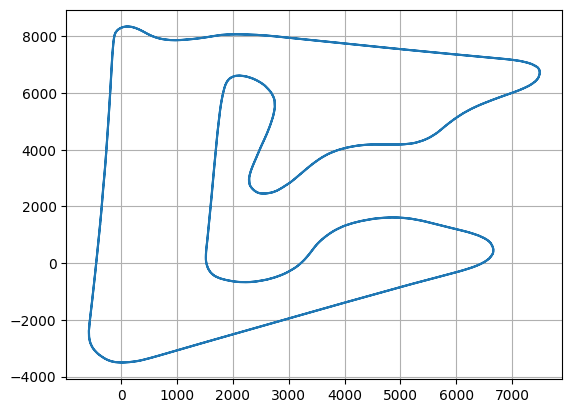

In [23]:
plt.plot(df['x'], df['y'])
# plt.plot(df2['x'], df2['y'])
plt.grid()
plt.show()

In [6]:
def get_l2_distance(x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

In [24]:
df[['x2', 'y2']] = df[['x', 'y']].shift(-1)
df['distance'] = df.apply(lambda row: get_l2_distance(row.x, row.y, row.x2, row.y2), axis = 1).cumsum()

In [25]:
df

,meeting_key,session_key,driver_number,date,x,y,z,x2,y2,distance
0,1229,9472,1,2024-03-02 15:05:20.038,-377,1359,-159,-369.0,1514.0,155.206314
1,1229,9472,1,2024-03-02 15:05:20.238,-369,1514,-159,-358.0,1764.0,405.448197
2,1229,9472,1,2024-03-02 15:05:20.518,-358,1764,-159,-348.0,1984.0,625.675353
3,1229,9472,1,2024-03-02 15:05:20.838,-348,1984,-159,-335.0,2317.0,958.929010
4,1229,9472,1,2024-03-02 15:05:21.139,-335,2317,-159,-330.0,2444.0,1086.027397
...,...,...,...,...,...,...,...,...,...,...
761,1229,9472,1,2024-03-02 15:08:31.979,-419,519,-159,-405.0,779.0,106174.898863
762,1229,9472,1,2024-03-02 15:08:32.319,-405,779,-159,-399.0,901.0,106297.046315
763,1229,9472,1,2024-03-02 15:08:32.479,-399,901,-159,-394.0,993.0,106389.182084
764,1229,9472,1,2024-03-02 15:08:32.619,-394,993,-159,-377.0,1347.0,106743.590041


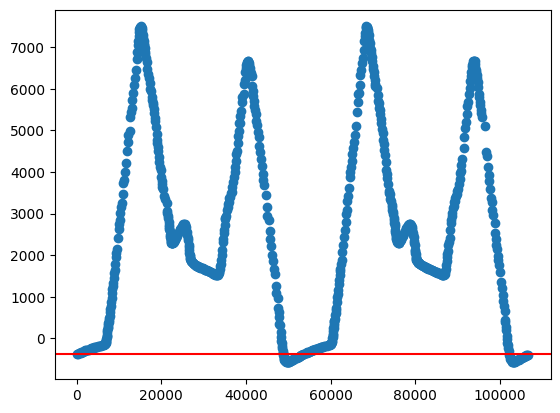

In [22]:
plt.scatter(df['distance'], df['x'])
plt.axhline(y=df.x[0], color='r', linestyle='-')
plt.show()

#### meetings

In [25]:
url = f'''https://api.openf1.org/v1/meetings?year=2024'''
get_data(url)

,circuit_key,circuit_short_name,meeting_key,meeting_code,location,country_key,country_code,country_name,meeting_name,meeting_official_name,gmt_offset,date_start,year
0,63,Sakhir,1229,BRN,Sakhir,36,BRN,Bahrain,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,03:00:00,2024-02-29T11:30:00,2024
1,149,Jeddah,1230,KSA,Jeddah,153,KSA,Saudi Arabia,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,03:00:00,2024-03-07T13:30:00,2024
2,149,Jeddah,1230,KSA,Jeddah,153,KSA,Saudi Arabia,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,03:00:00,2024-03-07T13:30:00,2024


#### pit

In [72]:
# seems to be broken for this year's sessions

url = f'''https://api.openf1.org/v1/pit?session_key=latest'''
get_data('https://api.openf1.org/v1/pit?session_key=9472')

""


#### position

In [75]:
url = f'''https://api.openf1.org/v1/position?session_key=9472'''
pos = get_data(url)
pos

,session_key,meeting_key,driver_number,date,position
0,9472,1229,1,2024-03-02T14:03:47.739000,1
1,9472,1229,2,2024-03-02T14:03:47.739000,18
2,9472,1229,3,2024-03-02T14:03:47.739000,14
3,9472,1229,4,2024-03-02T14:03:47.739000,7
4,9472,1229,10,2024-03-02T14:03:47.739000,20
...,...,...,...,...,...
430,9472,1229,18,2024-03-02T16:22:27.126000,10
431,9472,1229,27,2024-03-02T16:26:10.559000,16
432,9472,1229,31,2024-03-02T16:26:10.559000,17
433,9472,1229,3,2024-03-02T16:29:07.991000,13


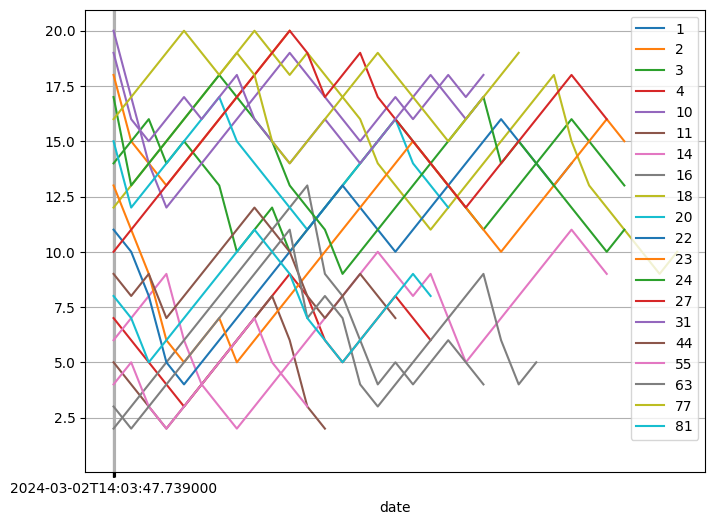

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
a = pos.groupby('driver_number').plot('date', 'position', ax = ax, grid = True)
ax.legend(pos.driver_number.unique())

#### race control

In [87]:
url = f'''https://api.openf1.org/v1/race_control?session_key=9472'''
get_data(url)

,session_key,meeting_key,date,category,flag,lap_number,message,driver_number,scope,sector
0,9472,1229,2024-03-02T14:06:41,Other,None,1,PINK HEAD PADDING MATERIAL MUST BE USED,NaN,None,NaN
1,9472,1229,2024-03-02T14:20:01,Flag,GREEN,1,GREEN LIGHT - PIT EXIT OPEN,NaN,Track,NaN
2,9472,1229,2024-03-02T14:30:01,Other,None,1,PIT EXIT CLOSED,NaN,None,NaN
3,9472,1229,2024-03-02T14:45:29,Other,None,1,RISK OF RAIN FOR F1 RACE IS 0%,NaN,None,NaN
4,9472,1229,2024-03-02T14:57:04,Drs,None,1,DRS DISABLED,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...
64,9472,1229,2024-03-02T16:34:28,Other,None,57,CAR 10 (GAS) TIME 1:35.908 DELETED - TRACK LIM...,NaN,None,NaN
65,9472,1229,2024-03-02T16:35:26,Flag,CHEQUERED,57,CHEQUERED FLAG,NaN,Track,NaN
66,9472,1229,2024-03-02T16:35:53,Other,None,57,CAR 3 (RIC) TIME 1:37.662 DELETED - TRACK LIMI...,NaN,None,NaN
67,9472,1229,2024-03-02T16:36:01,Flag,BLACK AND WHITE,57,BLACK AND WHITE FLAG FOR CAR 3 (RIC) - TRACK L...,3.0,Driver,NaN


#### sessions

In [30]:
url = f'''https://api.openf1.org/v1/sessions?year=2024'''
get_data(url)

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9465,Practice 1,2024-02-29T11:30:00,2024-02-29T12:30:00,03:00:00,Practice,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
1,9466,Practice 2,2024-02-29T15:00:00,2024-02-29T16:00:00,03:00:00,Practice,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
2,9467,Practice 3,2024-03-01T12:30:00,2024-03-01T13:30:00,03:00:00,Practice,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
3,9468,Qualifying,2024-03-01T16:00:00,2024-03-01T17:00:00,03:00:00,Qualifying,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
4,9472,Race,2024-03-02T15:00:00,2024-03-02T17:00:00,03:00:00,Race,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
5,9473,Practice 1,2024-03-07T13:30:00,2024-03-07T14:30:00,03:00:00,Practice,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024
6,9474,Practice 2,2024-03-07T17:00:00,2024-03-07T18:00:00,03:00:00,Practice,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024


#### stints

In [89]:
url = f'''https://api.openf1.org/v1/stints?session_key=9472'''
st = get_data(url)
st

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1229,9472,1,27,1,1,SOFT,0
1,1229,9472,1,18,1,9,SOFT,0
2,1229,9472,1,24,1,9,SOFT,0
3,1229,9472,1,2,1,10,SOFT,0
4,1229,9472,1,31,1,10,SOFT,0
...,...,...,...,...,...,...,...,...
58,1229,9472,3,1,38,58,SOFT,0
59,1229,9472,4,2,41,56,SOFT,0
60,1229,9472,4,27,42,57,SOFT,0
61,1229,9472,3,14,42,58,HARD,0


#### team radio

In [96]:
# seems to be broken too

In [100]:
url = 'https://api.openf1.org/v1/team_radio?session_key=9478'
get_data(url)

""


#### weather

In [8]:
url = f'''https://api.openf1.org/v1/weather?session_key=9472'''
w = get_data(url)
w['date'] = pd.to_datetime(w['date'])
w

,meeting_key,session_key,date,air_temperature,humidity,pressure,rainfall,track_temperature,wind_direction,wind_speed
0,1229,9472,2024-03-02 14:03:56.523,18.9,46.0,1017.1,0,26.5,162,0.9
1,1229,9472,2024-03-02 14:04:56.514,18.9,46.0,1017.0,0,26.5,55,1.0
2,1229,9472,2024-03-02 14:05:56.523,18.9,46.0,1017.0,0,26.5,55,1.0
3,1229,9472,2024-03-02 14:06:56.520,18.9,45.0,1017.0,0,26.2,85,1.1
4,1229,9472,2024-03-02 14:07:56.521,18.9,46.0,1017.0,0,26.2,178,1.0
...,...,...,...,...,...,...,...,...,...,...
152,1229,9472,2024-03-02 16:35:56.730,17.6,51.0,1017.5,0,21.9,0,0.7
153,1229,9472,2024-03-02 16:36:56.730,17.6,51.0,1017.5,0,21.9,271,0.0
154,1229,9472,2024-03-02 16:37:56.743,17.7,51.0,1017.5,0,21.9,0,0.4
155,1229,9472,2024-03-02 16:38:56.735,17.6,51.0,1017.5,0,21.9,257,0.0


In [9]:
w.applymap(str).to_sql('weather', con, if_exists = 'replace', index = False)

C:\Users\Pradeep Gopa\AppData\Local\Temp\ipykernel_68004\1048603674.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  w.applymap(str).to_sql('weather', con, if_exists = 'replace', index = False)


157

In [10]:
w.columns

Index(['meeting_key', 'session_key', 'date', 'air_temperature', 'humidity',
       'pressure', 'rainfall', 'track_temperature', 'wind_direction',
       'wind_speed'],
      dtype='object')

<Axes: xlabel='date'>

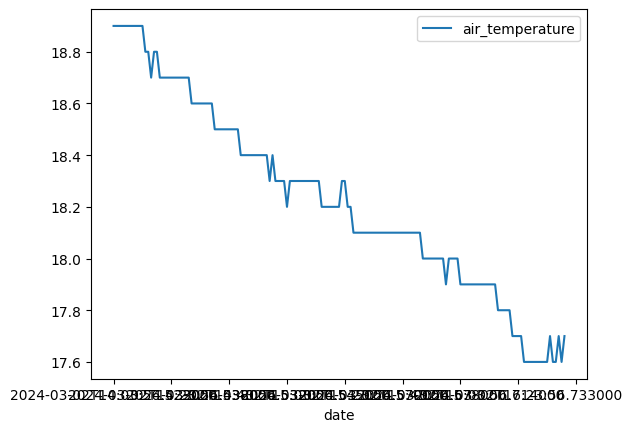

In [105]:
w.plot('date', 'air_temperature')

<Axes: xlabel='date'>

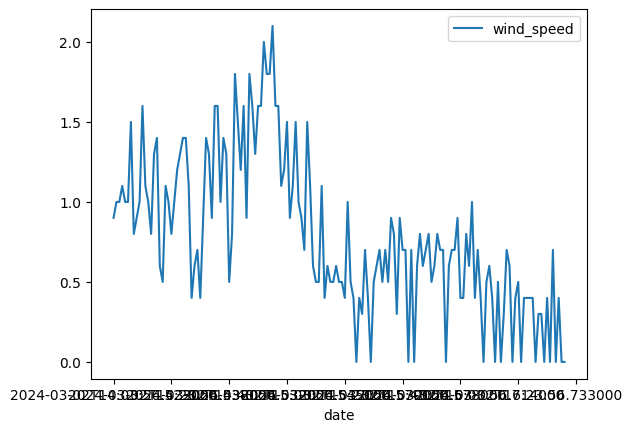

In [104]:
w.plot('date', 'wind_speed')